# ML Zoomcamp 2023 – Second Capstone Project

[Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs)

In [1]:
import tarfile
import urllib.request
import os
import re
from pandas import Series
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
images_url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar'
annotations_url = 'http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar'
images_dir = 'data/raw/Images'
annotation_dir = 'data/raw/Annotation'

In [3]:
plt.style.use('barplot-style.mplstyle')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [4]:
def download_data(url):
    basename = os.path.basename(url)
    raw_data_dir = Path.cwd() / 'data/raw'
    raw_data_file = raw_data_dir / basename
    if not raw_data_file.is_file():
        raw_data_dir.mkdir(parents=True, exist_ok=True)
        print(f'Downloading {basename}...')
        urllib.request.urlretrieve(url, raw_data_file)
        with tarfile.open(raw_data_file) as data_tarball:
            data_tarball.extractall(path=raw_data_dir)
    Path.unlink(raw_data_file)
    print(f'Finished downloading and extracting {basename}.')

In [5]:
if not Path(images_dir).exists():
    download_data(images_url)

In [6]:
if not Path(annotation_dir).exists():
    download_data(annotations_url)

In [7]:
breed_dir_list = [name for name in os.listdir(images_dir) if name not in ['.DS_Store']]
breed_dict = {}
for breed_dir in breed_dir_list:
    full_breed_dir = Path.cwd() / images_dir / breed_dir
    breed_name = re.sub(r'(n[0-9]+)-(\w+\-?\_?)', r'\2', breed_dir)
    breed_name = re.sub(r'-', r'_', breed_name.lower())
    breed_dict[breed_name] = len(list(full_breed_dir.glob('**/*.jpg')))

In [8]:
breed_sr = Series(breed_dict)
breed_sr.sort_values(ascending=False, inplace=True)
breed_sr.head(20)

maltese_dog             252
afghan_hound            239
scottish_deerhound      232
pomeranian              219
bernese_mountain_dog    218
samoyed                 218
irish_wolfhound         218
shih_tzu                214
great_pyrenees          213
leonberg                210
basenji                 209
tibetan_terrier         206
entlebucher             202
sealyham_terrier        202
airedale                202
pug                     200
saluki                  200
lakeland_terrier        197
cairn                   197
papillon                196
dtype: int64

In [9]:
top_num = 10
top_index_names = breed_sr.index[:top_num]
custom_labels = [' '.join(col.split('_')).capitalize() for col in top_index_names]

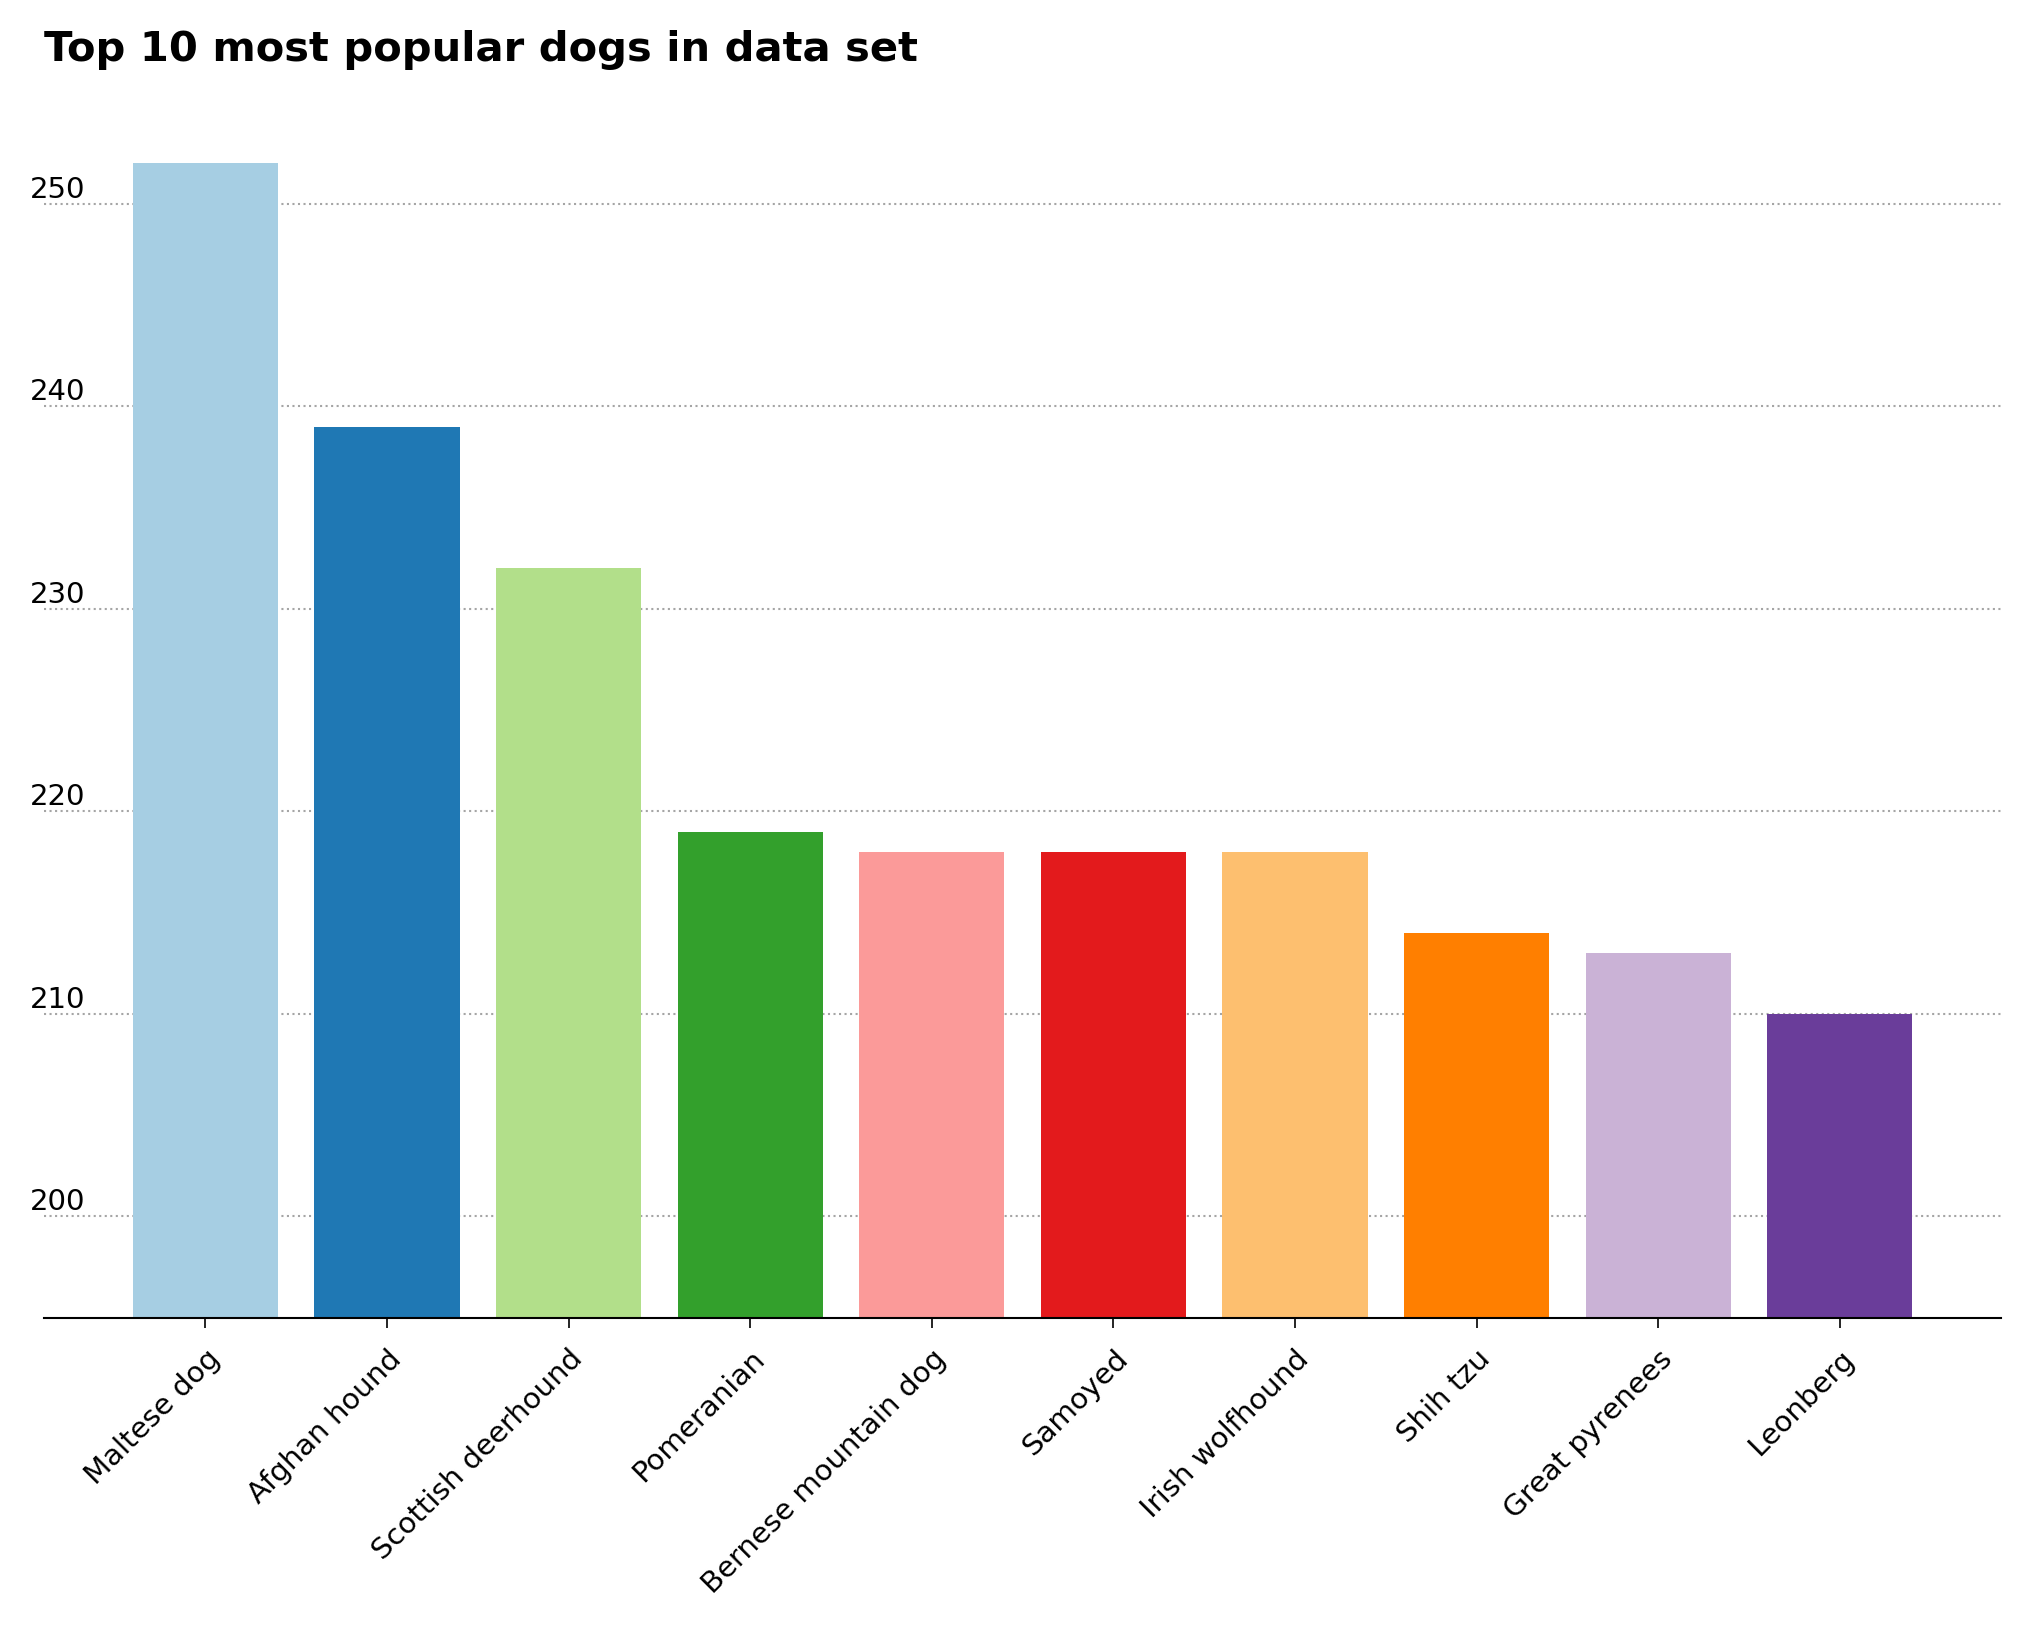

In [13]:
fig, ax = plt.subplots()
ax.bar(breed_sr.index[:top_num], breed_sr.values[:top_num], color=colors,)
plt.setp(ax.get_xticklabels(), ha='right', rotation_mode='anchor', rotation=45)
ax.set_xticks(range(10))
ax.set_xticklabels(custom_labels)
ax.set_ylim([195, 255])
ax.set_title(f'Top {top_num} most popular dogs in data set');